In [1]:
#importing all necessary modules
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import pathlib

In [ ]:
#Defining the path to the dataset
PathToDataset="/content/drive/MyDrive/Data"#paste dataset path here
PathToDataset=pathlib.Path(PathToDataset)

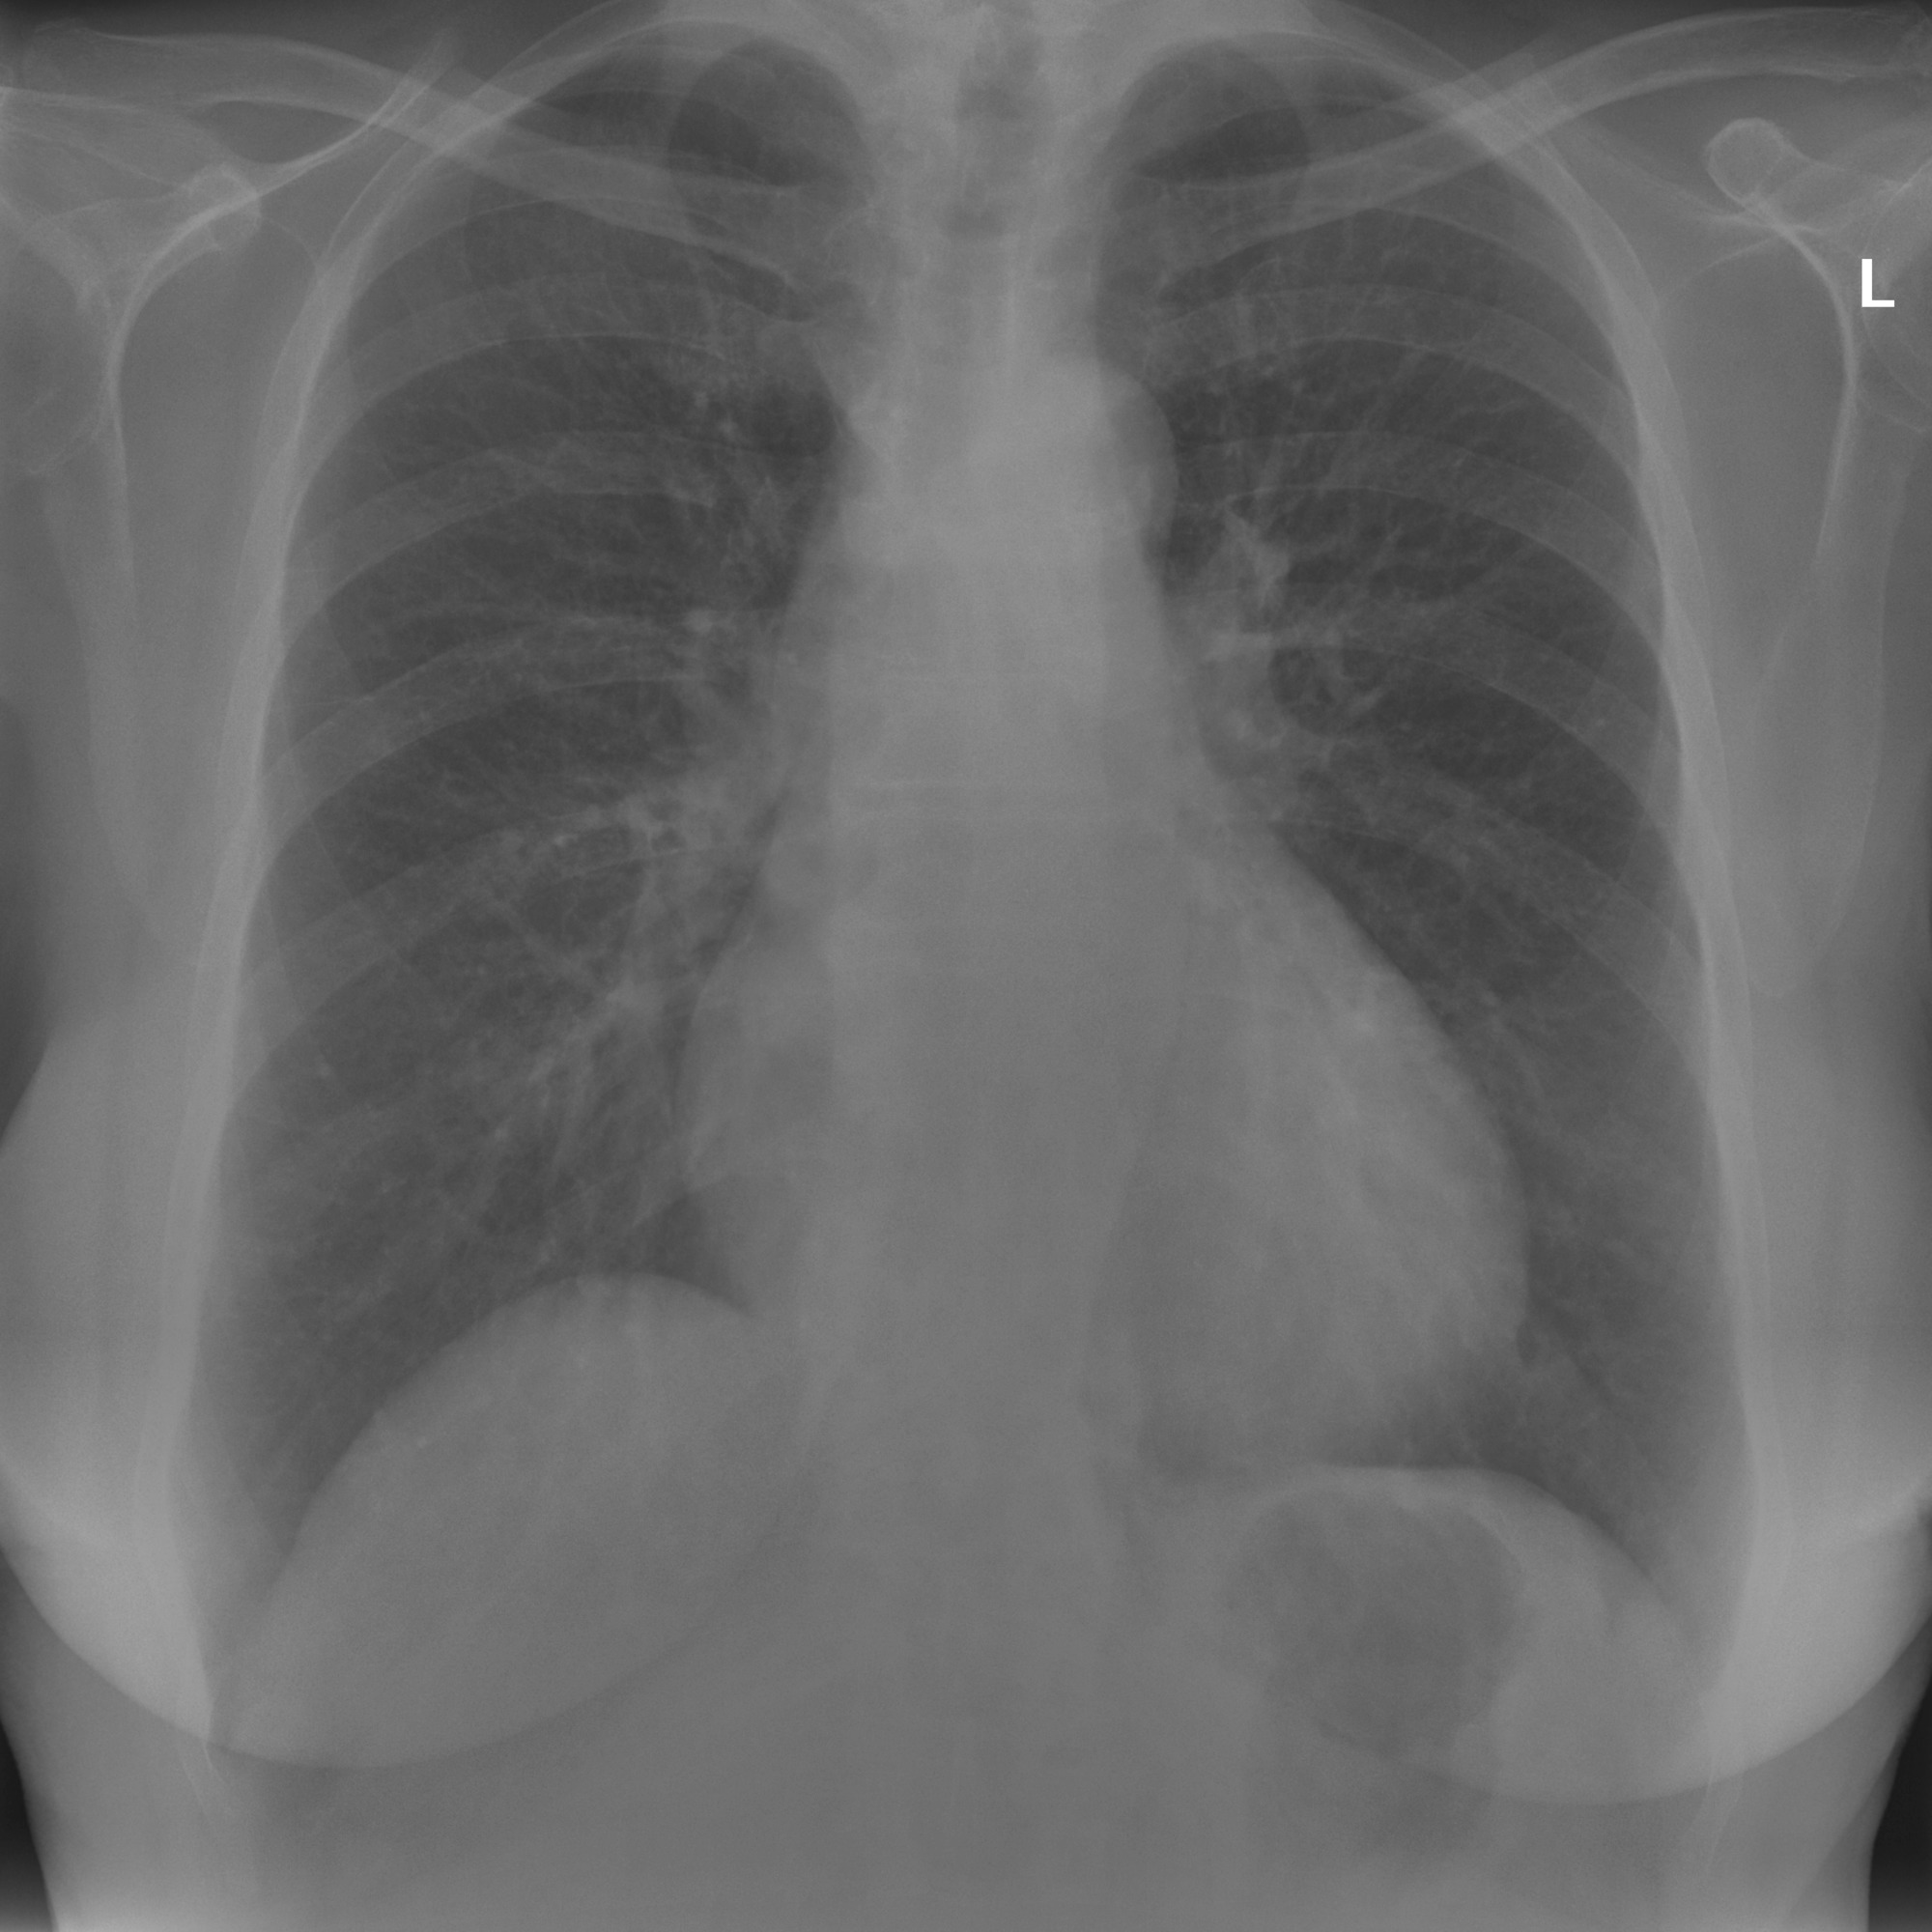

In [ ]:
ListofTrainImagePath=list(PathToDataset.glob('train/*/*.jpg'))

PIL.Image.open(str(ListofTrainImagePath[25]))

In [ ]:
#Defining the Batch Size and the dimension of the input image
batchSize=32
img_height=224
img_width=224

In [ ]:
#Test/Train Splitting stage
train_ds=tf.keras.utils.image_dataset_from_directory(
    PathToDataset.glob('train/*/*.jpg'),
    image_size=(img_height,img_width),
    batch_size=batchSize
)
test_ds=tf.keras.utils.image_dataset_from_directory(
    PathToDataset.glob('test/*/*.jpg'),
    image_size=(img_height,img_width),
    batch_size=batchSize
)


Found 5154 files belonging to 3 classes.
Found 1288 files belonging to 3 classes.


In [ ]:
#Defining the CNN Architecture
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization


model = Sequential()

model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(2,2), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(2,2), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(3))
model.add(Activation('softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 107, 107, 96)      34944     
                                                                 
 activation (Activation)     (None, 107, 107, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 53, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 53, 53, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 22, 22, 256)      

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
#Training the model
epochs=10
history=model.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


162/162 [==============================] - 1531s 9s/step - loss: 1.1119 - accuracy: 0.8132 - val_loss: 14.3909 - val_accuracy: 0.0908
Epoch 2/10
162/162 [==============================] - 1430s 9s/step - loss: 0.4710 - accuracy: 0.8692 - val_loss: 0.5585 - val_accuracy: 0.8183
Epoch 3/10
162/162 [==============================] - 1437s 9s/step - loss: 0.3419 - accuracy: 0.8906 - val_loss: 0.4842 - val_accuracy: 0.8502
Epoch 4/10
162/162 [==============================] - 1470s 9s/step - loss: 0.4692 - accuracy: 0.8603 - val_loss: 0.4106 - val_accuracy: 0.8595
Epoch 5/10
162/162 [==============================] - 1439s 9s/step - loss: 0.3780 - accuracy: 0.8737 - val_loss: 0.3912 - val_accuracy: 0.8828
Epoch 6/10
162/162 [==============================] - 1479s 9s/step - loss: 0.3083 - accuracy: 0.9005 - val_loss: 0.5272 - val_accuracy: 0.8509
Epoch 7/10
162/162 [==============================] - 1444s 9s/step - loss: 0.2690 - accuracy: 0.9107 - val_loss: 0.4792 - val_accuracy: 0.8455
Ep

In [ ]:
history.history

{'accuracy': [0.8131548166275024,
  0.8692277669906616,
  0.8905704021453857,
  0.8603026866912842,
  0.8736903667449951,
  0.9004656672477722,
  0.9107489585876465,
  0.9270469546318054,
  0.9220023155212402,
  0.8779588937759399],
 'loss': [1.1118855476379395,
  0.4710187315940857,
  0.34187087416648865,
  0.4692441523075104,
  0.37799403071403503,
  0.30832281708717346,
  0.2690373659133911,
  0.22710968554019928,
  0.23467013239860535,
  0.37213727831840515],
 'val_accuracy': [0.09083850681781769,
  0.8183229565620422,
  0.8501552939414978,
  0.8594720363616943,
  0.8827639818191528,
  0.850931704044342,
  0.8454968929290771,
  0.7864906787872314,
  0.9223602414131165,
  0.8936335444450378],
 'val_loss': [14.390900611877441,
  0.5585073828697205,
  0.48419806361198425,
  0.41062694787979126,
  0.3911917507648468,
  0.5271990895271301,
  0.4792240560054779,
  0.9175242781639099,
  0.2816210985183716,
  0.3038584291934967]}

In [ ]:
Accur=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

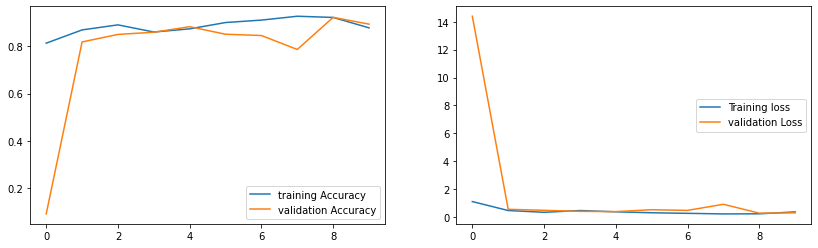

In [ ]:
#Plotting our results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(range(epochs),Accur,label='training Accuracy')
plt.plot(range(epochs),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training loss')
plt.plot(range(epochs),val_loss,label='validation Loss')
plt.legend(loc='right')


plt.show()